### Imported important libraries

In [501]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [502]:
df = pd.read_csv('./Training.csv')

# Load data from CSV files
train_data = pd.read_csv('./Training.csv')
test_data = pd.read_csv('./Training.csv')

In [503]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [504]:
df.shape

(4920, 133)

### Seeing any null values are there with descending format

In [505]:
df.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

### columns details

In [506]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

### Looking for how much percent of each diseases having in dataset

In [507]:
df['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

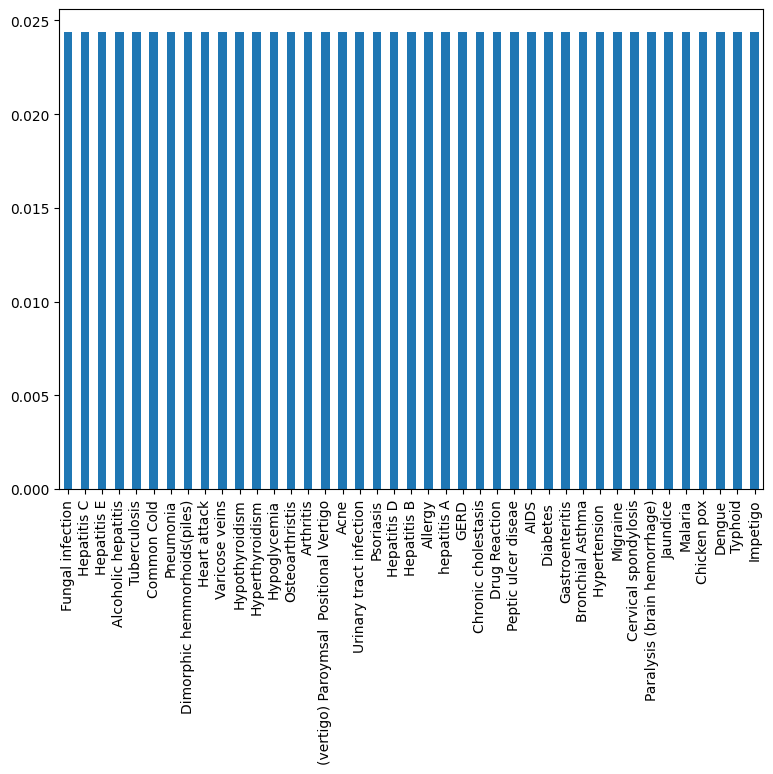

In [508]:
df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

### Checking if there are any other data types

In [509]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

### Corelation matrix for checking feature relavance to each other

In [510]:
# corr = df.corr()
# mask = np.array(corr)
# mask[np.tril_indices_from(mask)] = False
# plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
# sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

### Took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis

In [511]:
pd.crosstab(df['cold_hands_and_feets'],df['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


### Imported the chi square contingency

In [512]:
from scipy.stats import chi2_contingency

In [513]:
chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

Chi2ContingencyResult(statistic=4362.40173527245, pvalue=0.0, dof=1, expected_freq=array([[4.69464146e+03, 1.11358537e+02],
       [1.11358537e+02, 2.64146341e+00]]))

> #as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 

### Seperating the independent and dependent values to repective variables 

In [514]:
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [515]:
print(x.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [516]:
from sklearn.model_selection import train_test_split

### Divided into testing and training


In [517]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [518]:
# Split the data into x_train, x_test, y_train, y_test
x_train = train_data.drop(['prognosis'],axis =1)
y_train = train_data['prognosis']
x_test = test_data.drop(['prognosis'],axis =1)
y_test = test_data['prognosis']

### Importing naive_baye algorithm

In [519]:
from sklearn.naive_bayes import MultinomialNB

### Model fitting

In [520]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [521]:
from sklearn.metrics import accuracy_score

In [522]:
y_pred = mnb.predict(x_test)

In [523]:
accuracy_score(y_pred,y_test)*100

100.0

In [524]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


> #by cross validating we got mean also 100%

In [525]:
real_diseases = y_test.values

### for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 

In [526]:
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Fungal infection Actual:Fungal infection
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: Allergy Actual:Allergy
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: GERD Actual:GERD
Pred: Chro

### Importing Kfold

In [527]:
from sklearn.model_selection import KFold

### Function to run multiple algorithms with different K values of KFold.

In [528]:
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("At kvalue: ",i)
    return(train_scores,test_scores)   

In [529]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [530]:
algo_dict = {'logistic_regression':log,'decision_tree':dt,'random_forest_classifier':ran,'naive_bayes' : nb}
algo_train_scores={}
algo_test_scores={}

In [531]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

logistic_regression
At kvalue:  2
At kvalue:  4
At kvalue:  6
At kvalue:  8
At kvalue:  10
decision_tree
At kvalue:  2
At kvalue:  4
At kvalue:  6
At kvalue:  8
At kvalue:  10
random_forest_classifier
At kvalue:  2
At kvalue:  4
At kvalue:  6
At kvalue:  8
At kvalue:  10
naive_bayes
At kvalue:  2
At kvalue:  4
At kvalue:  6
At kvalue:  8
At kvalue:  10
{'logistic_regression': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'decision_tree': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'random_forest_classifier': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'naive_bayes': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'logistic_regression': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'decision_tree': {2: 0.8817073170731707, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'random_forest_classifier': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'naive_bayes': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


> Decision tree was found to be best fit with training score of 0.1 and testing score of 0.87 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.


In [532]:
train_score_dict=algo_train_scores
test_score_dict=algo_test_scores

In [533]:
from tabulate import tabulate

In [534]:
table = []
for algo, scores in train_score_dict.items():
    row = [algo]
    for k, v in scores.items():
        row.append(f"{v*100:.2f}%")
    table.append(row)
headers = ["Algorithm"]+["K-Value:2"]+["K-Value:4"]+["K-Value:6"]+["K-Value:8"]+["K-Value:10"]
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╕
│ Algorithm                │ K-Value:2   │ K-Value:4   │ K-Value:6   │ K-Value:8   │ K-Value:10   │
╞══════════════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╡
│ logistic_regression      │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ decision_tree            │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ random_forest_classifier │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ naive_bayes              │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │


In [535]:
table = []
for algo, scores in test_score_dict.items():
    row = [algo]
    for k, v in scores.items():
        row.append(f"{v*100:.2f}%")
    table.append(row)
headers = ["Algorithm"]+["K-Value:2"]+["K-Value:4"]+["K-Value:6"]+["K-Value:8"]+["K-Value:10"]
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╕
│ Algorithm                │ K-Value:2   │ K-Value:4   │ K-Value:6   │ K-Value:8   │ K-Value:10   │
╞══════════════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╡
│ logistic_regression      │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ decision_tree            │ 88.17%      │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ random_forest_classifier │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │
├──────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ naive_bayes              │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%     │ 100.00%      │


In [536]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

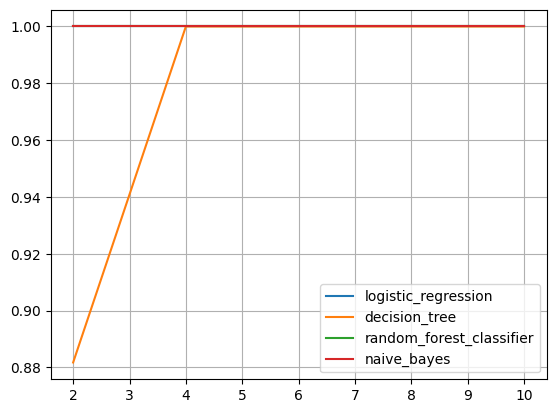

In [537]:
df_test.plot(grid = 1)
plt.show()
# plt.grid()

### Building the model at k value 2

In [538]:
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [539]:
percent = "{0} %".format(train_scores[2]*100)
print(percent)
percent = "{0} %".format(test_scores[2]*100)
print(percent)

100.0 %
87.07317073170732 %


### Saved the model in pickle format

In [540]:
import joblib
joblib.dump(dt,'model')

['model']

In [541]:
model = joblib.load('model')

## GUI for users to use Self-Assessment Features

In [542]:
a = list(range(2,134))
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = model.predict([a])
y_pred_2 = model.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))


2: itching
3: skin_rash
4: nodal_skin_eruptions
5: continuous_sneezing
6: shivering
7: chills
8: joint_pain
9: stomach_pain
10: acidity
11: ulcers_on_tongue
12: muscle_wasting
13: vomiting
14: burning_micturition
15: spotting_ urination
16: fatigue
17: weight_gain
18: anxiety
19: cold_hands_and_feets
20: mood_swings
21: weight_loss
22: restlessness
23: lethargy
24: patches_in_throat
25: irregular_sugar_level
26: cough
27: high_fever
28: sunken_eyes
29: breathlessness
30: sweating
31: dehydration
32: indigestion
33: headache
34: yellowish_skin
35: dark_urine
36: nausea
37: loss_of_appetite
38: pain_behind_the_eyes
39: back_pain
40: constipation
41: abdominal_pain
42: diarrhoea
43: mild_fever
44: yellow_urine
45: yellowing_of_eyes
46: acute_liver_failure
47: fluid_overload
48: swelling_of_stomach
49: swelled_lymph_nodes
50: malaise
51: blurred_and_distorted_vision
52: phlegm
53: throat_irritation
54: redness_of_eyes
55: sinus_pressure
56: runny_nose
57: congestion
58: chest_pain
59: weak